<a href="https://colab.research.google.com/github/M-Pushkar-Varshney-K/CipherSchools-Hybrid-DS-ML/blob/main/Lecture_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('outliers_data.csv')
df

,Name,Age,Salary,Department
0,Alice,25,50000,HR
1,Bob,30,1200000,Engineering
2,Charlie,35,70000,Engineering
3,David,50,60000,HR
4,Eve,28,80000,HR
5,Frank,40,55000,Sales
6,Grace,50,85000,Sales
7,Hank,60,90000,Sales
8,Ivy,32,1500000,Engineering
9,Jack,45,62000,Engineering


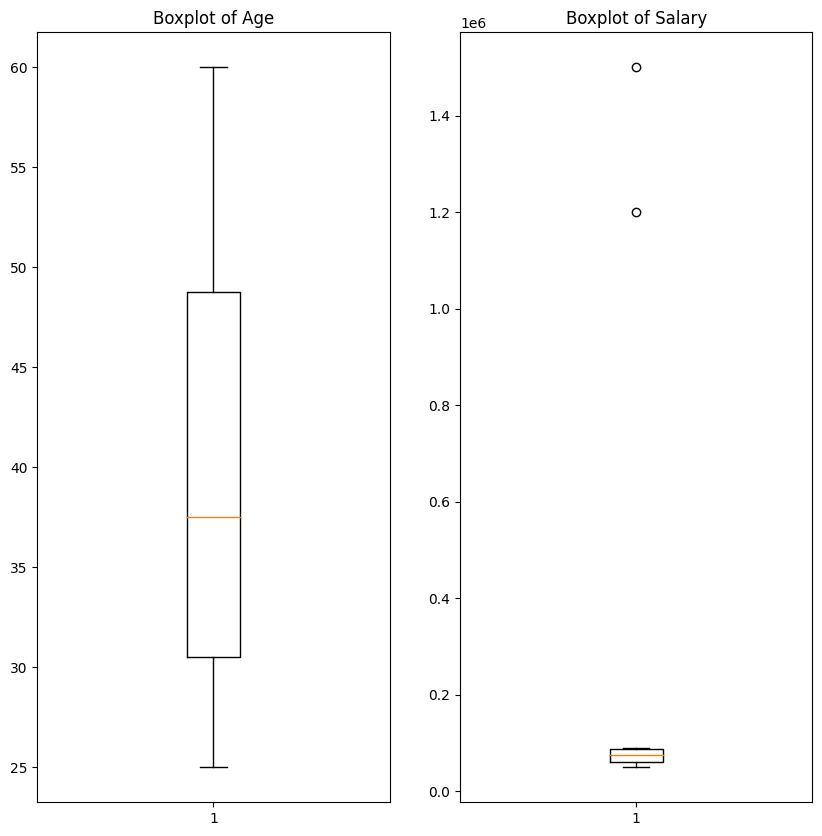

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.boxplot(df['Age'].dropna())
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
plt.boxplot(df['Salary'].dropna())
plt.title('Boxplot of Salary')

plt.show()

In [8]:
from scipy import stats

z_scores = stats.zscore(df[['Age', 'Salary']].dropna())
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_no_outliers = df[filtered_entries]

print('Outliers identified using Z-Score method:')
print(df[~filtered_entries])

Outliers identified using Z-Score method:
Empty DataFrame
Columns: [Name, Age, Salary, Department]
Index: []


In [9]:
Q1 = df[['Age', 'Salary']].quantile(0.25)
Q3 = df[['Age', 'Salary']].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers_iqr = df[~((df[['Age', 'Salary']] < (Q1 - 1.5 * IQR)) | (df[['Age', 'Salary']] > (Q3 + 1.5 * IQR))).any(axis=1)]

print('Outliers identified using IQR method:')
print(df[((df[['Age', 'Salary']] < (Q1 - 1.5 * IQR)) | (df[['Age', 'Salary']] > (Q3 + 1.5 * IQR))).any(axis=1)])

Outliers identified using IQR method:
  Name  Age   Salary   Department
1  Bob   30  1200000  Engineering
8  Ivy   32  1500000  Engineering


In [10]:
df_no_outliers = df[filtered_entries]
print('Data after removing outliers using Z-Score method:')
print(df_no_outliers)

Data after removing outliers using Z-Score method:
      Name  Age   Salary   Department
0    Alice   25    50000           HR
1      Bob   30  1200000  Engineering
2  Charlie   35    70000  Engineering
3    David   50    60000           HR
4      Eve   28    80000           HR
5    Frank   40    55000        Sales
6    Grace   50    85000        Sales
7     Hank   60    90000        Sales
8      Ivy   32  1500000  Engineering
9     Jack   45    62000  Engineering


In [12]:
df_capped = df.copy()
for column in ['Age', 'Salary']:
    Q1 = df_capped[column].quantile(0.25)
    Q3 = df_capped[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_capped[column] = df_capped[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

print('Data after capping outliers using IQR method:')
df_capped

Data after capping outliers using IQR method:


,Name,Age,Salary,Department
0,Alice,25,50000.0,HR
1,Bob,30,131125.0,Engineering
2,Charlie,35,70000.0,Engineering
3,David,50,60000.0,HR
4,Eve,28,80000.0,HR
5,Frank,40,55000.0,Sales
6,Grace,50,85000.0,Sales
7,Hank,60,90000.0,Sales
8,Ivy,32,131125.0,Engineering
9,Jack,45,62000.0,Engineering


In [13]:
df_replaced = df.copy()
for column in ['Age', 'Salary']:
    Q1 = df_replaced[column].quantile(0.25)
    Q3 = df_replaced[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df_replaced[column].median()
    df_replaced[column] = df_replaced[column].apply(lambda x: median if x > upper_bound or x < lower_bound else x)

print('Data after replacing outliers with median values:')
df_replaced

Data after replacing outliers with median values:


,Name,Age,Salary,Department
0,Alice,25,50000.0,HR
1,Bob,30,75000.0,Engineering
2,Charlie,35,70000.0,Engineering
3,David,50,60000.0,HR
4,Eve,28,80000.0,HR
5,Frank,40,55000.0,Sales
6,Grace,50,85000.0,Sales
7,Hank,60,90000.0,Sales
8,Ivy,32,75000.0,Engineering
9,Jack,45,62000.0,Engineering
